<a href="https://colab.research.google.com/github/tuanymariiah/data_analysis/blob/main/P%5B04%5D_Dados_Vacina%C3%A7%C3%A3o_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importacao das bibliotecas
import pandas as pd
import numpy as np


In [2]:

file ='/content/drive/MyDrive/Projetos Pessoais/Portifólio/P[04]/part-00000-d66b59bf-108c-49ed-8a76-ea7122fec2b1.c000.csv'
df_vacina = pd.read_csv(file,nrows=108013, delimiter=';',error_bad_lines=False)


Primeiro, iremos verificar e remover as linhas duplicadas, tendo como referência o id do paciente, ***paciente_id***. Porque dessa forma, podemos verificar se o paciente tomou as duas doses ou apenas a dose única 

In [3]:
subset = ['paciente_id', 
          'paciente_datanascimento', 
          'paciente_endereco_nmmunicipio', 
          'vacina_grupoatendimento_nome', 
          'vacina_categoria_nome']
print('Quantidade de Pacientes duplicados: ',df_vacina.duplicated(subset=subset, keep='last').sum())  

Quantidade de Pacientes duplicados:  288


Como podemos ver, temos cerca de 288 pacientes duplicados, isso significa que o mesmo já tomou a 1a dose, possivelmente, devido a isso irei remover esses registros duplicados, mantendo apenas o último 

In [4]:
df_vacina.drop_duplicates(subset= subset,keep='last', inplace = True)
print('Quantidade de Pacientes duplicados, após a remoção: ',df_vacina.duplicated(subset=subset, keep='last').sum())  
print('Quantidade atual de registros: ', df_vacina.shape[0])

Quantidade de Pacientes duplicados, após a remoção:  0
Quantidade atual de registros:  107725


In [5]:
#verifica se tem outliers, principalmente na idade do paciente
df_vacina.describe()

,paciente_idade,paciente_racacor_codigo,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_cep,estabelecimento_valor,estabelecimento_municipio_codigo,vacina_grupoatendimento_codigo,vacina_categoria_codigo,vacina_fabricante_referencia,vacina_codigo,id_sistema_origem
count,107724.000000,107724.000000,107388.000000,107388.0,103405.000000,1.077250e+05,107725.000000,107725.000000,105756.000000,0.0,107725.000000,107725.000000
mean,46.276354,17.495934,243012.883302,10.0,58999.614409,4.283853e+06,240709.782892,6824.694825,7.399401,NaN,85.794217,17884.558923
std,17.171805,34.956971,22031.373858,0.0,4820.687266,2.108753e+06,353.815700,78157.799693,9.629590,NaN,0.831526,127.219686
min,2.000000,1.000000,110001.000000,10.0,0.000000,2.371707e+06,240010.000000,0.000000,1.000000,NaN,85.000000,17862.000000
25%,32.000000,1.000000,240360.000000,10.0,59122.000000,2.416751e+06,240360.000000,203.000000,2.000000,NaN,85.000000,17862.000000
50%,44.000000,3.000000,240810.000000,10.0,59280.000000,3.008320e+06,240810.000000,926.000000,9.000000,NaN,86.000000,17862.000000
75%,59.000000,4.000000,240820.000000,10.0,59600.000000,6.347223e+06,240810.000000,926.000000,9.000000,NaN,87.000000,17862.000000
max,131.000000,99.000000,999999.000000,10.0,99999.000000,9.915117e+06,241500.000000,999999.000000,300.000000,NaN,88.000000,18602.000000


ideias de analises


* qual vacina houve mais demanda
* qual grupo racial teeve mais pessoas vacinadas
* quantidade de homens e mulheres que foram vacinadas
* qual municipio teve mais pessoas vacinadas
* verificar se tem pessoas de outros paises tomando vacina no RN
* verificar se tem vacinas em atraso
* **CLASSIFICACAO DE VACINAS 0 para quem tomou a 1a dose  e 1 para quem tomou a 2a dose**
**0 para quem tá 100% imunizado 1 para quem nao está**


Primeiramente, irei ajustar tanto o nome das vacinas aplicadas como o nome das doses para facilitar as análises

In [6]:
def ajustadose(registro_dose):
    if registro_dose['vacina_descricao_dose']=="1ª Dose":
      return 'D1'
    elif registro_dose['vacina_descricao_dose']=='2ª Dose':
      return 'D2'
    elif registro_dose['vacina_descricao_dose']=="Única ":
      return 'DU'
    else:
      return 'DU'
df_vacina['vacina_descricao_dose'] = df_vacina.apply(ajustadose, axis=1)
df_vacina['vacina_descricao_dose'].value_counts()

D1    101680
D2      5975
DU        70
Name: vacina_descricao_dose, dtype: int64

In [7]:
def ajusta_nome_vacina(registro_dose):
    if registro_dose['vacina_nome']=="Vacina Covid-19 - Covishield":
      return 'OXFORD'
    elif registro_dose['vacina_nome']=='Covid-19-Coronavac-Sinovac/Butantan':
      return 'CORONAVAC'
    elif registro_dose['vacina_nome']=="Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer":
      return 'PFIZER'
    elif registro_dose['vacina_nome']=="Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag":
      return 'JANSSEN'

df_vacina['vacina_nome'] = df_vacina.apply(ajusta_nome_vacina, axis=1)
df_vacina['vacina_nome'].value_counts()

OXFORD       50484
CORONAVAC    29048
PFIZER       28070
JANSSEN        123
Name: vacina_nome, dtype: int64

Uma vez que modificamos o nome das doses, como o nome das vacinas. Agora iremos analisar as doses aplicadas, D1 + D2. Posteriormente, iremos analisar de acordo com as doses aplicadas, ou seja, quem está 50% imunizado e 100% imunizado.

Com isso, agora iremos ver qual vacina tem mais demanda para o estado.

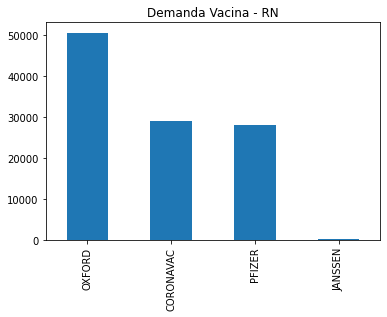

In [8]:
df_vacina['vacina_nome'].value_counts().plot(kind='bar', title='Demanda Vacina - RN')

Quantidade de Homens e mulheres que se vacinaram que tomaram pelo menos a primeira dose

In [9]:
df_vacina['paciente_enumsexobiologico'].value_counts()

F    59314
M    48410
Name: paciente_enumsexobiologico, dtype: int64

como o estado do RN, possui muitos municípios irei apresentar pelo menos os 10 maiores que mais vacinou seus habitantes.

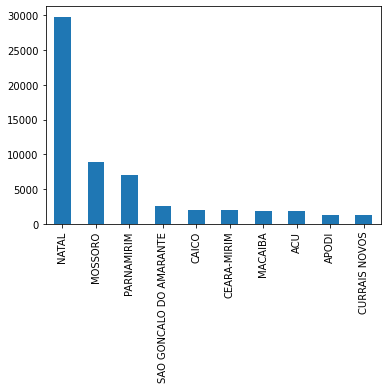

In [10]:
df_vacina['paciente_endereco_nmmunicipio'].value_counts().head(10).plot(kind='bar')

Quando a vacinação começou no estado do RN, as primeiras demandas vieram para os profissionais da saúde e idosos, com isso conseguimos ver se pelo menos a grande maioria dos profissionais da saúde estão imune ao vírus.

In [11]:
df_vacina['vacina_categoria_nome'].value_counts().plot(kind='barh')

Trabalhadores de Saúde                             61418
Faixa Etária                                       21156
Comorbidades                                       14197
Trabalhadores da Educação                           1939
Trabalhadores Industriais                           1798
Pessoas com Deficiência                              794
Pessoas de 60 anos ou mais institucionalizadas       760
Gestantes                                            758
Outros                                               594
Povos e Comunidades Tradicionais                     476
Trabalhadores de Transporte                          393
Forças de Segurança e Salvamento                     344
Forças Armadas (membros ativos)                      214
População Privada de Liberdade                       200
Povos Indígenas                                      173
Puérperas                                            158
Trabalhadores de Limpeza Urbana                      131
Trabalhadores Portuários       

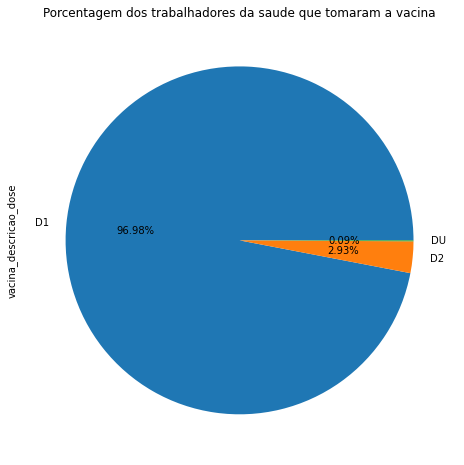

In [25]:
ps = df_vacina[df_vacina['vacina_categoria_nome']=='Trabalhadores de Saúde']
ps['vacina_descricao_dose'].value_counts().plot(kind='pie',autopct='%.2f%%', figsize=[8,8],title='Porcentagem dos trabalhadores da saude que tomaram a vacina')

Quais vacinas mais aplicadas nos profissionais da saúde

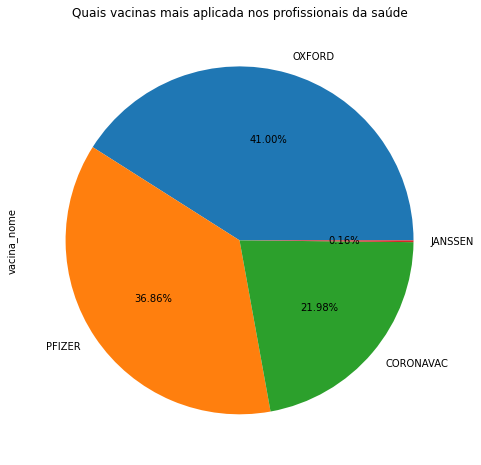

In [27]:
ps = df_vacina[df_vacina['vacina_categoria_nome']=='Trabalhadores de Saúde']
ps['vacina_nome'].value_counts().plot(kind='pie',autopct='%.2f%%', figsize=[8,8],title='Quais vacinas mais aplicadas nos profissionais da saúde')

In [13]:
df_vacina.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_datanascimento', 'paciente_enumsexobiologico',
       'paciente_racacor_codigo', 'paciente_racacor_valor',
       'paciente_endereco_coibgemunicipio', 'paciente_endereco_copais',
       'paciente_endereco_nmmunicipio', 'paciente_endereco_nmpais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumnacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaosocial', 'estalecimento_nofantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoatendimento_codigo',
       'vacina_grupoatendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataaplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem', 'data_importacao_rnds', 'id_sistema_origem'],
      